# Basics

Run this first to get the data

In [29]:
# Optional: magic for reloading packages at every cell evaluation, great if you're changing code
#%load_ext autoreload
#%autoreload 2

In [1]:
## Imports

# Basic
import numpy as np
import matplotlib.pyplot as plt
import random

# My code, from bary.py
import bary

# Data: https://www.tensorflow.org/datasets
import tensorflow_datasets as tfds

In [2]:
## Load MNIST data and mass transport cost matrix M with helper function
# M: (n x n) giving the cost of moving from one location in the 28x28 image to another; n = 28**2
# X: (n x N) with each column the histogram for a single digit
# y: length N vector of labels
N = 1000
M, X, y = bary.load_MNIST(N)

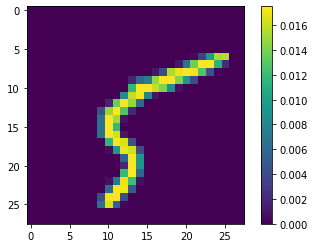

In [3]:
## Plot a digit
c = X[:,np.random.randint(0,N)]
img = np.reshape(c, (28,28))
plt.imshow(img)
plt.colorbar()
plt.show()

# Average-case digit

Picks out all copies of digit $d$ and averages them together into a single digit

The code below should run in about 30 seconds, 5 seconds per gradient descent step for the first few iterations; you can do fewer steps to save time, and the results are comparable

Run things in Jupyter Lab for progress bars

Gradient descent progress: 100%|███████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.82s/it]


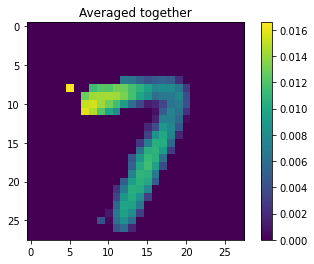

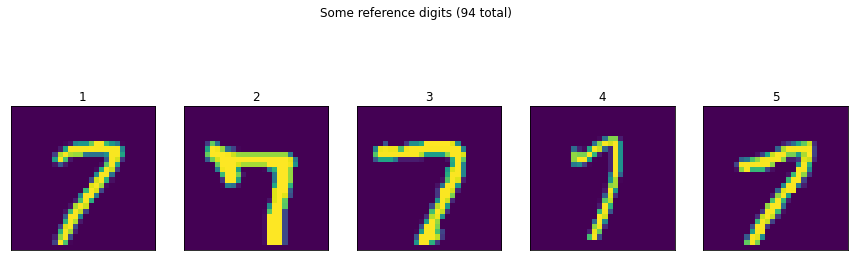

In [54]:
# Which digit to use
d = 7

# Get the data
Xp = X[:,y == d]
m = np.shape(Xp)[1]

# Run the descent
r, _, _ = bary.sinkhorn_barycenter(M, Xp, noise = 0.01, iterations = 30, steps = 10)

# Plot the averaged digit
bary.plot_digits(r, width=1)
plt.title('Averaged together')
plt.show()

# Plot some of the reference digits
Xpp = Xp[:,np.random.choice(m,5)]
bary.plot_digits(Xpp, width=5)
plt.suptitle('Some reference digits (%d total)' % m)
plt.show()

# Clustering

Picks out all copies of digits $d_1,d_2$ and tries to figure out what two digits are present, creating two average-case digits

Does this by running k-means with Sinkhorn barycenters for finding cluster centers

Runs in about 4 minutes

As-is, probably not applicable: there are better ways to do this. But it's really cool and a good proof-of-concept for Sinkhorn in applications.

Initializing...
Done initializing


Lloyd's algorithm progress: 100%|████████████████████████████████████████████████████████| 4/4 [03:28<00:00, 52.22s/it]


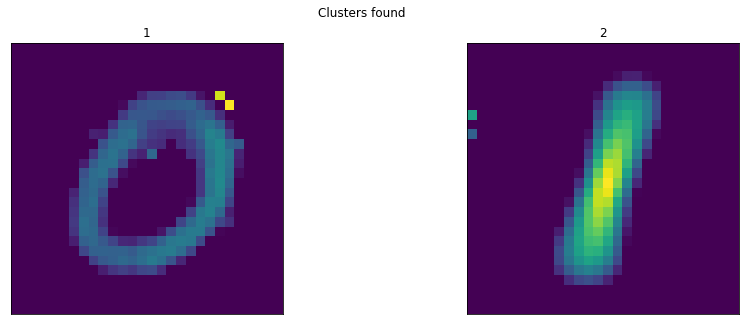

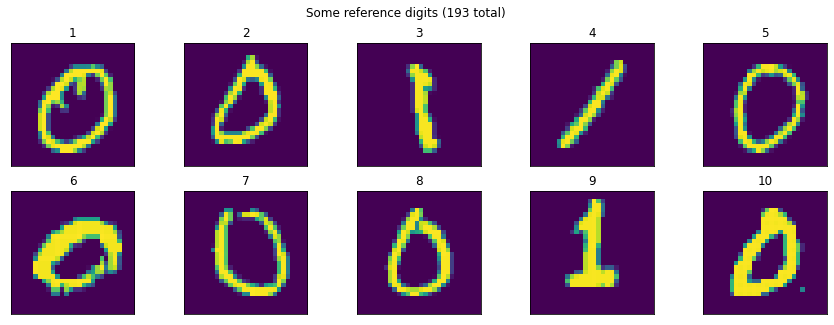

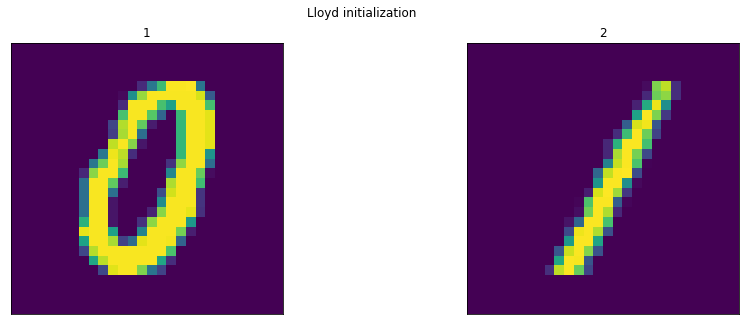

In [56]:
# Digits
d1 = 0
d2 = 1

# Get the data
bools = [(label == d1) or (label == d2) for label in y]
Xp = X[:,bools]
m = np.shape(Xp)[1]

# Cluster!
k = 2
_, r, R = bary.k_means_sinkhorn_barycenter(M, Xp, k, noise = 0.01, eta = 0.5, l = 10, iter_sink = 20, iter_Dsink = 20, iter_grad = 6, iter_lloyd = 4)

# Plot the cluster centers
bary.plot_digits(r, width=2)
plt.suptitle('Clusters found')
plt.show()

# Plot some of the reference digits
Xpp = Xp[:,np.random.choice(np.shape(Xp)[1],10)]
bary.plot_digits(Xpp, width=5)
plt.suptitle('Some reference digits (%d total)' % m)
plt.show()

# Plot the Lloyd's algorithm initialization
bary.plot_digits(R[:,:,0], width=2)
plt.suptitle('Lloyd initialization')
plt.show()

# Brief overview

The relevant literature is in the Papers folder. I implemented the ideas in the "Sinkhorn Gradients.pdf" document for finding average-case digits. But I also implemented k-means with the average-case digit idea to cluster digits. I did try clustering all 10 digits, but at that scale it has issues in telling the different digits apart.

For average-case digits, we define an objective that is small when our guess for the average digit is in the "middle" of all the reference digits. We replace the Wasserstein mass transport with Sinkhorn divergence for speed, and optimize with gradient descent to find the average-case digit. 